a benchmark test in my laptop

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz


In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM

In [3]:
%load_ext autoreload
%autoreload 2

In [56]:
image = np.load('../examples/FeNb_phase_boundary.npy')

In [96]:
step = 2

In [97]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=100,window_y=100,
                       patch_x=100,patch_y=100,
                       step=step,
                       descriptor_name=descriptor_name,
                       max_num_points = 100,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

method: direct
time_cost: 175.51[s]


([], <a list of 0 Text major ticklabel objects>)

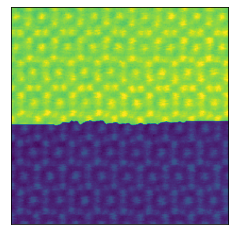

In [163]:
plt.imshow(labels+0.5*image)
plt.xticks([])
plt.yticks([])
#plt.plot([140],[48],'ro',markersize=6)
#plt.plot([260],[48],'ro',markersize=6)
#plt.plot([102],[310],'ro',markersize=6)
#plt.plot([222],[310],'ro',markersize=6)

#plt.plot([140,102],[48,310],color='r',linewidth=2)
#plt.plot([140,260],[48,48],color='r',linewidth=2)
#plt.plot([260,222],[48,310],color='r',linewidth=2)
#plt.plot([102,222],[310,310],color='r',linewidth=2)


#plt.plot([102],[685],'bo',markersize=6)
#plt.plot([222],[685],'bo',markersize=6)
#plt.plot([102],[915],'bo',markersize=6)
#plt.plot([222],[915],'bo',markersize=6)

#plt.plot([102,222],[685,685],color='b',linewidth=2)
#plt.plot([222,222],[685,915],color='b',linewidth=2)
#plt.plot([222,102],[915,915],color='b',linewidth=2)
#plt.plot([102,102],[685,915],color='b',linewidth=2)

([], <a list of 0 Text major ticklabel objects>)

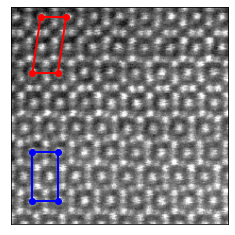

In [99]:
plt.imshow(image[:,:],cmap='gray')
plt.plot([140],[48],'ro',markersize=6)
plt.plot([260],[48],'ro',markersize=6)
#plt.plot([140],[190],'ro',markersize=6)
#plt.plot([260],[190],'ro',markersize=6)
plt.plot([102],[310],'ro',markersize=6)
plt.plot([222],[310],'ro',markersize=6)

plt.plot([140,102],[48,310],color='r',linewidth=2)
plt.plot([140,260],[48,48],color='r',linewidth=2)

plt.plot([260,222],[48,310],color='r',linewidth=2)
plt.plot([102,222],[310,310],color='r',linewidth=2)

#plt.plot([102],[450],'ro',markersize=6)
#plt.plot([222],[450],'ro',markersize=6)
#plt.plot([62],[570],'ro',markersize=6)
#plt.plot([172],[570],'ro',markersize=6)


plt.plot([102],[685],'bo',markersize=6)
plt.plot([222],[685],'bo',markersize=6)
#plt.plot([62],[800],'bo',markersize=6)
#plt.plot([172],[800],'bo',markersize=6)
plt.plot([102],[915],'bo',markersize=6)
plt.plot([222],[915],'bo',markersize=6)

plt.plot([102,222],[685,685],color='b',linewidth=2)
plt.plot([222,222],[685,915],color='b',linewidth=2)
plt.plot([222,102],[915,915],color='b',linewidth=2)
plt.plot([102,102],[685,915],color='b',linewidth=2)
#plt.plot([62],[1023],'bo',markersize=6)
#plt.plot([172],[1023],'bo',markersize=6)

plt.plot()
plt.xticks([])
plt.yticks([])

In [117]:
descriptors = seg._descriptors
labels_kmeans= seg._kmeans.labels_
pca_features = seg._PCA_components
shape = seg._descriptors.shape

In [120]:
pca_features = np.reshape(pca_features, (-1,pca_features.shape[-1]))

In [121]:
from mpl_toolkits.mplot3d import Axes3D

[]

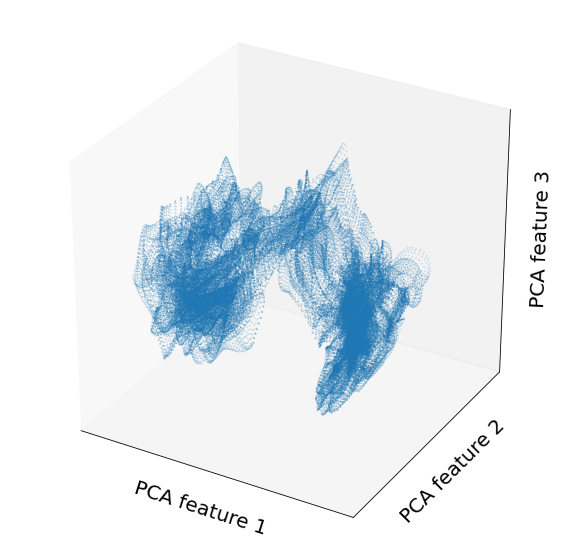

In [162]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], s=0.05, alpha=0.6)
ax.set_xlabel('PCA feature 1',fontsize=20)
ax.set_ylabel('PCA feature 2',fontsize=20)
ax.set_zlabel('PCA feature 3',fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


Text(-1, 0.2, 'Cluster 2')

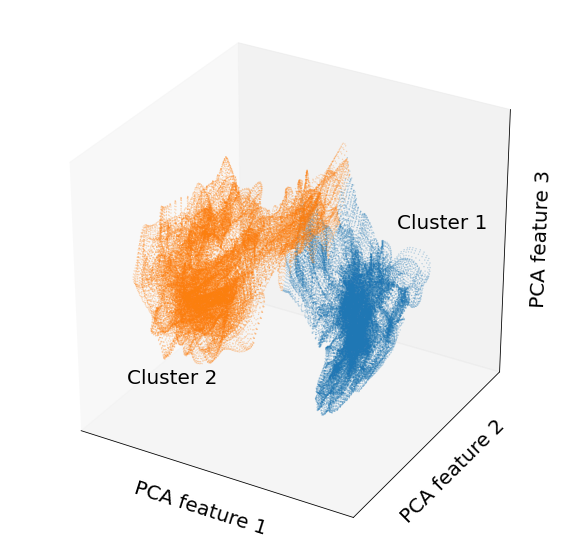

In [161]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
indices = np.argwhere(labels_kmeans==0)
ax.scatter(pca_features[indices,0], pca_features[indices,1], pca_features[indices,2],  s=0.05, alpha=0.6) 
indices = np.argwhere(labels_kmeans==1)
ax.scatter(pca_features[indices,0], pca_features[indices,1], pca_features[indices,2],  s=0.05, alpha=0.6)
ax.set_xlabel('PCA feature 1',fontsize=20)
ax.set_ylabel('PCA feature 2',fontsize=20)
ax.set_zlabel('PCA feature 3',fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.text(0.5,0.2,0.3,'Cluster 1',fontsize=20)

ax.text(-1,0.2,-0.8,'Cluster 2',fontsize=20)